# Task 3
**Performed by: Kushakov Evgenii, J4132C**

In [25]:
#Import tools
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1

Develop yourself using numpy library:

a) python function for implementation of gradient descent (GD) with momentum algorithm for the function of two variables f(x,y).

b) python function for implementation of ADAM optimization algorithm for the function of two variables f(x,y).

### Gradient descent with momentum

In [34]:
def gradient_descent_with_momentum(objective, derivative, start_solution, n_iter, step_size, momentum):
    ans_x = []
    ans_y = []
    ans_z = []
    x = start_solution[0]
    y = start_solution[1]
    change_x = 0.0
    change_y = 0.0
    for i in range(n_iter):
        grad_x, grad_y = derivative(x, y)
        new_change_x = step_size * grad_x + momentum * change_x
        new_change_y = step_size * grad_y + momentum * change_y
        x = x - new_change_x
        y = y - new_change_y
        change_x = new_change_x
        change_y = new_change_y
        z = objective(x, y)
        ans_x.append(x)
        ans_y.append(y)
        ans_z.append(z)
        print(f'{i} f({x}, {y}) = {z}')
    return ans_x, ans_y, ans_z

### ADAM optimization

In [35]:
def adam_optimization(objective, derivative, start_solution, n_iter, alpha, beta1, beta2, eps = 1e-8):
    ans_x = []
    ans_y = []
    ans_z = []
    x = start_solution[0]
    y = start_solution[1]
    m_x = [0.0 for _ in range(n_iter)]
    m_y = [0.0 for _ in range(n_iter)]
    v_x = [0.0 for _ in range(n_iter)]
    v_y = [0.0 for _ in range(n_iter)]
    for i in range(n_iter):
        grad_x, grad_y = derivative(x, y)
        m_x[i] = beta1 * m_x[i-1] + (1 - beta1) * grad_x
        v_x[i] = beta2 * v_x[i-1] + (1 - beta2) * (grad_x**2)
        m_y[i] = beta1 * m_y[i-1] + (1 - beta1) * grad_y
        v_y[i] = beta2 * v_y[i-1] + (1 - beta2) * (grad_y**2)
        mhat_x = m_x[i] / (1 - beta1**(i + 1))
        vhat_x = v_x[i] / (1 - beta2**(i + 1))
        mhat_y = m_y[i] / (1 - beta1**(i + 1))
        vhat_y = v_y[i] / (1 - beta2**(i + 1))
        x = x - alpha * mhat_x / (sqrt(vhat_x) + eps)
        y = y - alpha * mhat_y / (sqrt(vhat_y) + eps)
        z = objective(x, y)
        ans_x.append(x)
        ans_y.append(y)
        ans_z.append(z)
        print(f'{i} f({x}, {y}) = {z}')
    return ans_x, ans_y, ans_z

## Exercise 2

Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).

In [58]:
def objective(x, y):
    return (x - 2)**2 + (y + 3)**2

def derivative(x, y):
    grad_x = 2 * (x - 2)
    grad_y = 2 * (y + 3)
    return grad_x, grad_y

In [10]:
start_solution = [0, 0]
n_iter = 100

In [11]:
step_size = 0.1
momentum = 0.3

In [12]:
alpha = 0.02
beta1 = 0.8
beta2 = 0.999

### Gradient descent with momentum

In [59]:
gdwm_x, gdwm_y, gdwm_z = gradient_descent_with_momentum(objective, derivative, start_solution, n_iter, step_size, momentum)

0 f(0.4, -0.6000000000000001) = 8.32
1 f(0.8400000000000001, -1.2600000000000002) = 4.373199999999999
2 f(1.2040000000000002, -1.8060000000000003) = 2.059251999999999
3 f(1.4724000000000002, -2.2086) = 0.9046757199999997
4 f(1.6584400000000001, -2.48766) = 0.3791555091999999
5 f(1.782564, -2.673846) = 0.15365484581199987
6 f(1.8632884, -2.7949326) = 0.06074270011731994
7 f(1.91484804, -2.8722720600000002) = 0.023565282948485124
8 f(1.947346324, -2.921019486) = 0.009010331188017168
9 f(1.9676265444, -2.9514398166) = 0.0034061320393267824
10 f(1.98018530164, -2.97027795246) = 0.0012760223810678066
11 f(1.987915868484, -2.981873802726) = 0.0004745852621119473
12 f(1.9926518648404, -2.9889777972606) = 0.0001754840435521884
13 f(1.99554229077924, -2.99331343616886) = 6.458130736476139e-05
14 f(1.997300960405044, -2.995951440607566) = 2.3675647889207385e-05
15 f(1.9983683692117764, -2.9975525538176644) = 8.652211844508298e-06
16 f(1.999014918011441, -2.998522377017161) = 3.153756203597639e-0

### ADAM optimization

In [60]:
adam_x, adam_y, adam_z = adam_optimization(objective, derivative, start_solution, n_iter, alpha, beta1, beta2)

0 f(0.01999999995, -0.019999999966666668) = 12.800800000396666
1 f(0.039988630827472685, -0.03999248938746934) = 12.603289030168154
2 f(0.059958289090176156, -0.05997247861964374) = 12.407523666543838
3 f(0.07990144823877954, -0.07993505282917304) = 12.213557744171302
4 f(0.09981073036180729, -0.09987541779036249) = 12.021441852784752
5 f(0.11967897118786554, -0.11978894098750395) = 11.831222915851008
6 f(0.13949927684758628, -0.13967118691839941) = 11.642943859795453
7 f(0.1592650710772051, -0.15951794585862547) = 11.45664337845561
8 f(0.17897013215699456, -0.17932525571840757) = 11.27235579260434
9 f(0.19860861942241992, -0.19908941697939264) = 11.090111000096037
10 f(0.21817508967332702, -0.2188070010108546) = 10.909934508686893
11 f(0.23766450420769575, -0.23847485231630788) = 10.731847541018945
12 f(0.25707222750532416, -0.25809008544310236) = 10.555867199678666
13 f(0.2763940187792999, -0.277650077398281) = 10.382006679589358
14 f(0.2956260177054894, -0.2971524564592266) = 10.210

## Exercise 3

Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N or in the form of 2D-plane graph.

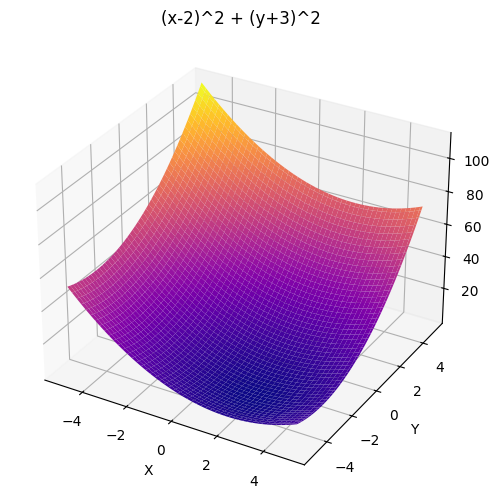

In [66]:
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
x_values, y_values = np.meshgrid(x_range, y_range)
z_values = objective(x_values, y_values)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.plot_surface(x_values, y_values, z_values, cmap = 'plasma')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('(x-2)^2 + (y+3)^2')

plt.show()

### Gradient descent with momentum

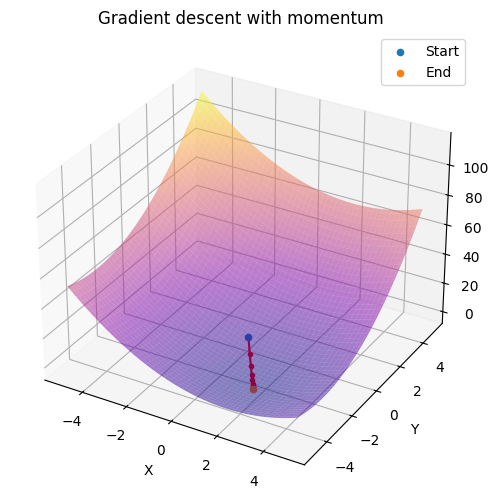

In [77]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.plot(gdwm_x, gdwm_y, gdwm_z, '.-', color = 'r')
ax.scatter(gdwm_x[0], gdwm_y[0], gdwm_z[0], label = 'Start')
ax.scatter(gdwm_x[-1], gdwm_y[-1], gdwm_z[-1], label = 'End')
ax.plot_surface(x_values, y_values, z_values, cmap = 'plasma', alpha = 0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Gradient descent with momentum')
ax.legend()

plt.show()

### ADAM optimization

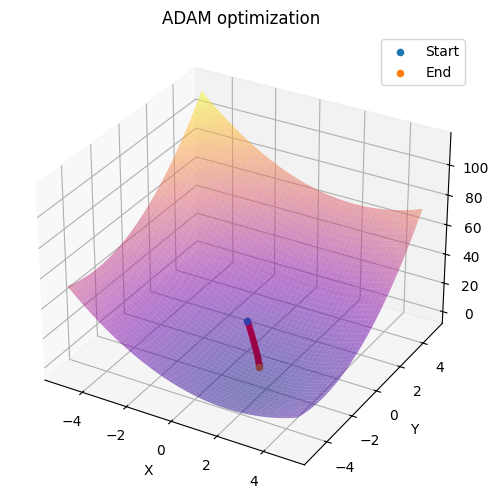

In [78]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.plot(adam_x, adam_y, adam_z, '.-', color = 'r')
ax.scatter(adam_x[0], adam_y[0], adam_z[0], label = 'Start')
ax.scatter(adam_x[-1], adam_y[-1], adam_z[-1], label = 'End')
ax.plot_surface(x_values, y_values, z_values, cmap = 'plasma', alpha = 0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('ADAM optimization')
ax.legend()

plt.show()

## Exercise 4

Write a conclusions about the accuracy of the implemented algorithms.

*Gradient descent with momentum* is a modification of the standard gradient descent algorithm that adds a momentum term. This momentum term helps the algorithm overcome small local optima and accelerates convergence in many cases. But this algorithm might still suffer from slow convergence in certain scenarios or if the momentum parameter is not set correctly. It doesn't adapt the learning rate, which means a fixed learning rate may not be optimal for all parts of the optimization landscape. Gradient descent with momentum can be quite accurate and efficient, particularly when the learning rate and momentum parameters are well-tuned. It performs well in escaping local minima and converging to good solutions.

*ADAM* is an adaptive optimization algorithm that dynamically adjusts the learning rate for each parameter. It combines the benefits of both momentum and RMSprop by keeping a running average of both the gradient and its square. But this algorithm can be sensitive to the choice of hyperparameters (e.g., the learning rate, and the beta1 and beta2 parameters) and may require more memory to store the additional moments (m and v). Adam excels in scenarios where the landscape of the optimization problem is complex and has varying curvatures. However, it may not be the best choice for all problems, and its performance can be affected by the choice of hyperparameters.

**Conclusion:**

Both gradient descent with momentum and Adam are accurate optimization algorithms, but their performance depends on the specific characteristics of the optimization problem and the appropriate tuning of hyperparameters. For most machine learning tasks, Adam tends to be a robust choice due to its adaptive learning rate capabilities. Still, it's essential to experiment with different optimization algorithms and hyperparameters to find the one that performs best for a particular problem..